In [2]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

22

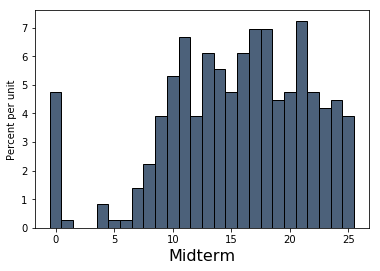

In [3]:
# 13.1 Percentiles
scores_and_sections = Table.read_table('scores_by_section.csv')
scores_and_sections
scores_and_sections.hist('Midterm', bins=np.arange(-0.5, 25.6, 1))
percentile(85, scores_and_sections.column('Midterm'))
sorted_scores = np.sort(scores_and_sections.column('Midterm'))
sorted_scores[round(0.85 * len(sorted_scores))]

Left,Right
106486,106486
116060,116060
97791.5,97791.5
111542,111542
105449,105449
116587,116587
110299,110299
121443,121443
100321,100321
114323,114323


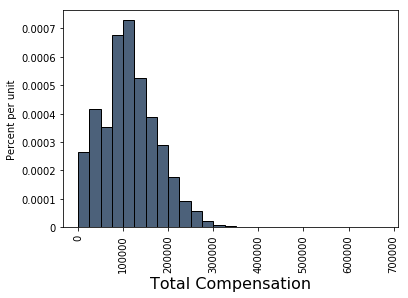

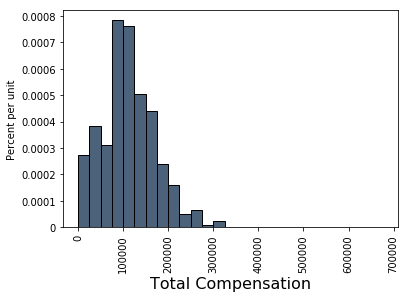

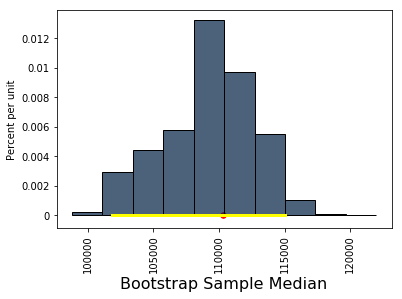

In [4]:
# 13.2 The Bootstrap
sf2015 = Table.read_table('san_francisco_2015.csv')
sf2015
sf2015.sort('Total Compensation', descending=True)
sf2015 = sf2015.where('Salaries', are.above(10000))
sf2015.hist('Total Compensation', bins = np.arange(0, 700000, 25000))
#sf2015.sort('Total Compensation', descending=True).show(2)
pop_median = percentile(50, sf2015.column('Total Compensation'))

our_sample = sf2015.sample(500, with_replacement=False)
our_sample.hist('Total Compensation', bins=np.arange(0, 700000, 25000))
percentile(50, our_sample.column('Total Compensation'))

def bootstrap_median(original_sample, label, replications):
    """Returns an array of bootstrapped sample medians:
    original_sample: table containing the original sample
    label: label of column containing the variable
    replications: number of bootstrap samples
    """
    one_column = original_sample.select(label)
    medians = []
    for i in np.arange(replications):
        one_sample = one_column.sample()
        medians.append(percentile(50, one_sample.column(0)))
        
    return medians

bm = bootstrap_median(our_sample, 'Total Compensation', 5000)
resampled_medians = Table().with_column('Bootstrap Sample Median', bm)
resampled_medians.hist()
plt.scatter(pop_median, 0, color='red', s=30)

left_end = percentile(2.5, bm)
left_end
right_end = percentile(97.5, bm)
right_end
plt.plot([left_end, right_end], [0, 0], color='yellow', lw=3, zorder=1)

# THE BIG SIMULATION: This one takes several minutes.
# Generate 100 intervals, in the table intervals
left_ends = right_ends = []
for i in np.arange(100):
    one_sample = sf2015.sample(500)
    bm = bootstrap_median(one_sample, 'Total Compensation', 5000)
    left_ends.append(percentile(2.5, bm))
    right_ends.append(percentile(97.5, bm))
intervals = Table().with_column('Left', left_ends, 'Right', right_ends)
intervals

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


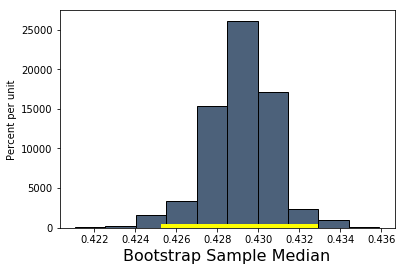

In [13]:
# 13.3 Confidence intervals

# Confidence Interval for a Population Median: Bootstrap Percentile Method
baby = Table.read_table('baby.csv')
ratios = baby.select('Birth Weight', 'Gestational Days').with_column(
 'Ratio BW/GD', baby.column(0)/baby.column(1),
)
ratios
#ratios.hist('Ratio BW/GD')

def bootstrap_median(original_sample, label, replications):
    """Returns an array of bootstrapped sample medians:
    original_sample: table containing the original sample
    label: label of column containing the variable
    replications: number of bootstrap samples
    """
    one_column = original_sample.select(label)
    medians = []
    for i in np.arange(replications):
        one_sample = one_column.sample()
        medians.append(percentile(50, one_sample.column(0)))
        
    return medians
bstrap_medians = bootstrap_median(ratios, 'Ratio BW/GD', 5000)
bstrap_medians
confidence_interval = [percentile(2.5, bstrap_medians), percentile(97.5, bstrap_medians)]
confidence_interval
resampled_medians = Table().with_column('Bootstrap Sample Median', bstrap_medians)
resampled_medians.hist()
plt.plot(confidence_interval, [0, 0], color='yellow', lw=8)

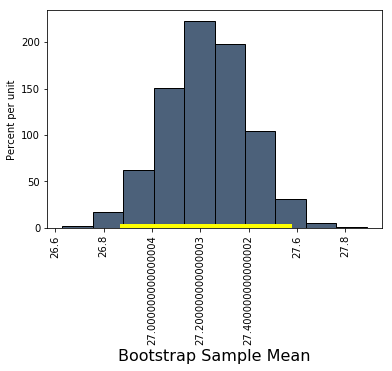

In [17]:
# 13.3 Confidence intervals

#Confidence Interval for a Population Mean: Bootstrap Percentile Method
def bootstrap_mean(original_sample, label, replications):
    """Returns an array of bootstrapped sample medians:
    original_sample: table containing the original sample
    label: label of column containing the variable
    replications: number of bootstrap samples
    """
    one_column = original_sample.select(label)
    medians = []
    for i in np.arange(replications):
        one_sample = one_column.sample()
        medians.append(np.mean(one_sample.column(0)))
    
    return medians

bstrap_means = bootstrap_mean(baby, 'Maternal Age', 5000)
confidence_interval_mean = [percentile(2.5, bstrap_means), percentile(97.5, bstrap_means)]
resampled_means = Table().with_columns('Bootstrap Sample Mean', bstrap_means)
resampled_means.hist()
plt.plot(confidence_interval_mean, [0, 0], color='yellow', lw=8)

In [ ]:
# 13.4 